
# DSP — IDFT in Matrix Notation (W, K) + Signal Synthesis

We synthesize discrete-time signals by **IDFT in matrix form** for different values of \(N\).
We explicitly build the matrices **\(K\)** (outer product of indices) and **\(W\)** (Fourier matrix), and plot the synthesized signals.


In [7]:

import numpy as np
import matplotlib.pyplot as plt

def fourier_matrices(N:int):
    k = np.arange(N).reshape(-1,1)
    mu = np.arange(N).reshape(1,-1)
    K = k * mu
    W = np.exp(1j * 2*np.pi * K / N)
    return K, W

def idft_matrix(x_mu):
    x_mu = np.asarray(x_mu, dtype=complex).reshape(-1,1)
    N = x_mu.shape[0]
    K, W = fourier_matrices(N)
    x_k = (W @ x_mu) / N
    return x_k.flatten(), K, W

def show_matrices(K, W, max_show=8):
    N = K.shape[0]
    m = min(N, max_show)
    print(f"N={N}\nK (top-left {m}x{m}):\n", K[:m,:m])
    Wr = np.round(W.real[:m,:m], 3)
    Wi = np.round(W.imag[:m,:m], 3)
    print(f"\nW (real, top-left {m}x{m}):\n", Wr)
    print(f"\nW (imag, top-left {m}x{m}):\n", Wi)

def plot_signal(x_k, title="Synthesized signal x[k] (IDFT)"):
    k = np.arange(len(x_k))
    plt.figure(figsize=(8,3))
    plt.stem(k, x_k.real)
    plt.title(title + " — real part")
    plt.xlabel("k")
    plt.ylabel("Re{x[k]}")
    plt.tight_layout()
    plt.show()

    if np.max(np.abs(x_k.imag)) > 1e-9:
        plt.figure(figsize=(8,3))
        plt.stem(k, x_k.imag)
        plt.title(title + " — imaginary part")
        plt.xlabel("k")
        plt.ylabel("Im{x[k]}")
        plt.tight_layout()
        plt.show()


## 1) Show K and W for N=4

In [8]:

K4, W4 = fourier_matrices(4)
show_matrices(K4, W4, max_show=4)


N=4
K (top-left 4x4):
 [[0 0 0 0]
 [0 1 2 3]
 [0 2 4 6]
 [0 3 6 9]]

W (real, top-left 4x4):
 [[ 1.  1.  1.  1.]
 [ 1.  0. -1. -0.]
 [ 1. -1.  1. -1.]
 [ 1. -0. -1.  0.]]

W (imag, top-left 4x4):
 [[ 0.  0.  0.  0.]
 [ 0.  1.  0. -1.]
 [ 0.  0. -0.  0.]
 [ 0. -1.  0.  1.]]



## 2) Variants — IDFT synthesis for the given \(x_\mu\)



=== Variant 1 — N=10 ===
N=10
K (top-left 8x8):
 [[ 0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7]
 [ 0  2  4  6  8 10 12 14]
 [ 0  3  6  9 12 15 18 21]
 [ 0  4  8 12 16 20 24 28]
 [ 0  5 10 15 20 25 30 35]
 [ 0  6 12 18 24 30 36 42]
 [ 0  7 14 21 28 35 42 49]]

W (real, top-left 8x8):
 [[ 1.     1.     1.     1.     1.     1.     1.     1.   ]
 [ 1.     0.809  0.309 -0.309 -0.809 -1.    -0.809 -0.309]
 [ 1.     0.309 -0.809 -0.809  0.309  1.     0.309 -0.809]
 [ 1.    -0.309 -0.809  0.809  0.309 -1.     0.309  0.809]
 [ 1.    -0.809  0.309  0.309 -0.809  1.    -0.809  0.309]
 [ 1.    -1.     1.    -1.     1.    -1.     1.    -1.   ]
 [ 1.    -0.809  0.309  0.309 -0.809  1.    -0.809  0.309]
 [ 1.    -0.309 -0.809  0.809  0.309 -1.     0.309  0.809]]

W (imag, top-left 8x8):
 [[ 0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.588  0.951  0.951  0.588  0.    -0.588 -0.951]
 [ 0.     0.951  0.588 -0.588 -0.951 -0.     0.951  0.588]
 [ 0.     0.951 -0.588 -0.588  

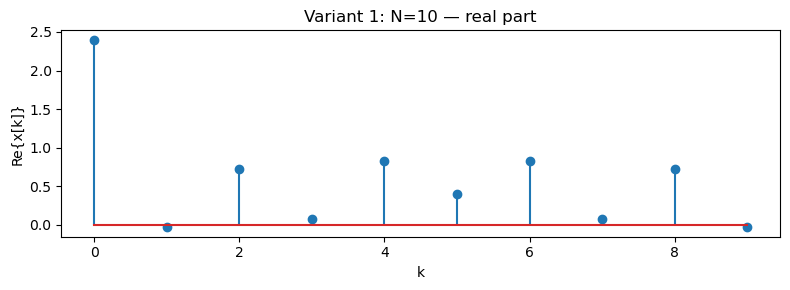

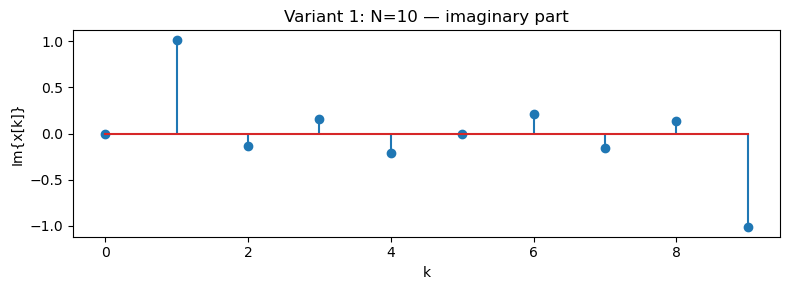


=== Variant 2 — N=13 ===
N=13
K (top-left 8x8):
 [[ 0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7]
 [ 0  2  4  6  8 10 12 14]
 [ 0  3  6  9 12 15 18 21]
 [ 0  4  8 12 16 20 24 28]
 [ 0  5 10 15 20 25 30 35]
 [ 0  6 12 18 24 30 36 42]
 [ 0  7 14 21 28 35 42 49]]

W (real, top-left 8x8):
 [[ 1.     1.     1.     1.     1.     1.     1.     1.   ]
 [ 1.     0.885  0.568  0.121 -0.355 -0.749 -0.971 -0.971]
 [ 1.     0.568 -0.355 -0.971 -0.749  0.121  0.885  0.885]
 [ 1.     0.121 -0.971 -0.355  0.885  0.568 -0.749 -0.749]
 [ 1.    -0.355 -0.749  0.885  0.121 -0.971  0.568  0.568]
 [ 1.    -0.749  0.121  0.568 -0.971  0.885 -0.355 -0.355]
 [ 1.    -0.971  0.885 -0.749  0.568 -0.355  0.121  0.121]
 [ 1.    -0.971  0.885 -0.749  0.568 -0.355  0.121  0.121]]

W (imag, top-left 8x8):
 [[ 0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.465  0.823  0.993  0.935  0.663  0.239 -0.239]
 [ 0.     0.823  0.935  0.239 -0.663 -0.993 -0.465  0.465]
 [ 0.     0.993  0.239 -0.935 -

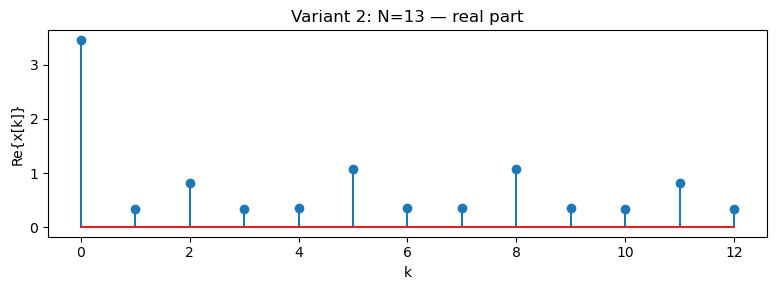

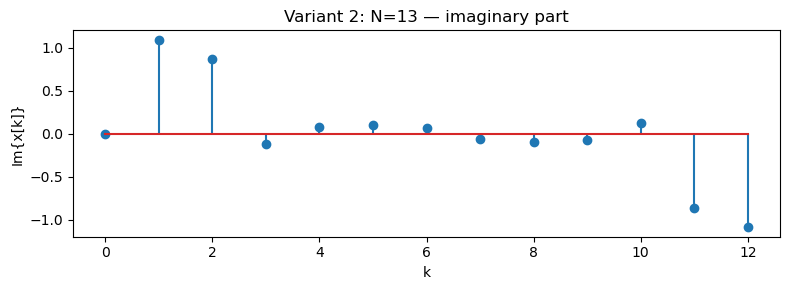


=== Variant 3 — N=10 ===
N=10
K (top-left 8x8):
 [[ 0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7]
 [ 0  2  4  6  8 10 12 14]
 [ 0  3  6  9 12 15 18 21]
 [ 0  4  8 12 16 20 24 28]
 [ 0  5 10 15 20 25 30 35]
 [ 0  6 12 18 24 30 36 42]
 [ 0  7 14 21 28 35 42 49]]

W (real, top-left 8x8):
 [[ 1.     1.     1.     1.     1.     1.     1.     1.   ]
 [ 1.     0.809  0.309 -0.309 -0.809 -1.    -0.809 -0.309]
 [ 1.     0.309 -0.809 -0.809  0.309  1.     0.309 -0.809]
 [ 1.    -0.309 -0.809  0.809  0.309 -1.     0.309  0.809]
 [ 1.    -0.809  0.309  0.309 -0.809  1.    -0.809  0.309]
 [ 1.    -1.     1.    -1.     1.    -1.     1.    -1.   ]
 [ 1.    -0.809  0.309  0.309 -0.809  1.    -0.809  0.309]
 [ 1.    -0.309 -0.809  0.809  0.309 -1.     0.309  0.809]]

W (imag, top-left 8x8):
 [[ 0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.588  0.951  0.951  0.588  0.    -0.588 -0.951]
 [ 0.     0.951  0.588 -0.588 -0.951 -0.     0.951  0.588]
 [ 0.     0.951 -0.588 -0.588  

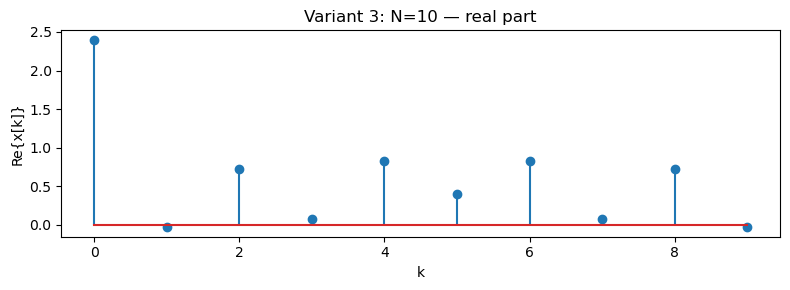

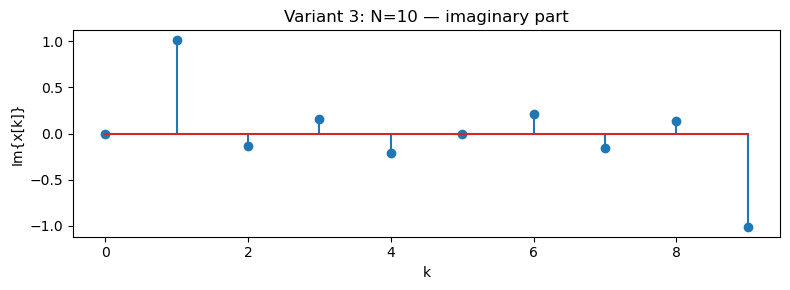


=== Variant 4 — N=9 ===
N=9
K (top-left 8x8):
 [[ 0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7]
 [ 0  2  4  6  8 10 12 14]
 [ 0  3  6  9 12 15 18 21]
 [ 0  4  8 12 16 20 24 28]
 [ 0  5 10 15 20 25 30 35]
 [ 0  6 12 18 24 30 36 42]
 [ 0  7 14 21 28 35 42 49]]

W (real, top-left 8x8):
 [[ 1.     1.     1.     1.     1.     1.     1.     1.   ]
 [ 1.     0.766  0.174 -0.5   -0.94  -0.94  -0.5    0.174]
 [ 1.     0.174 -0.94  -0.5    0.766  0.766 -0.5   -0.94 ]
 [ 1.    -0.5   -0.5    1.    -0.5   -0.5    1.    -0.5  ]
 [ 1.    -0.94   0.766 -0.5    0.174  0.174 -0.5    0.766]
 [ 1.    -0.94   0.766 -0.5    0.174  0.174 -0.5    0.766]
 [ 1.    -0.5   -0.5    1.    -0.5   -0.5    1.    -0.5  ]
 [ 1.     0.174 -0.94  -0.5    0.766  0.766 -0.5   -0.94 ]]

W (imag, top-left 8x8):
 [[ 0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.643  0.985  0.866  0.342 -0.342 -0.866 -0.985]
 [ 0.     0.985  0.342 -0.866 -0.643  0.643  0.866 -0.342]
 [ 0.     0.866 -0.866 -0.     0.

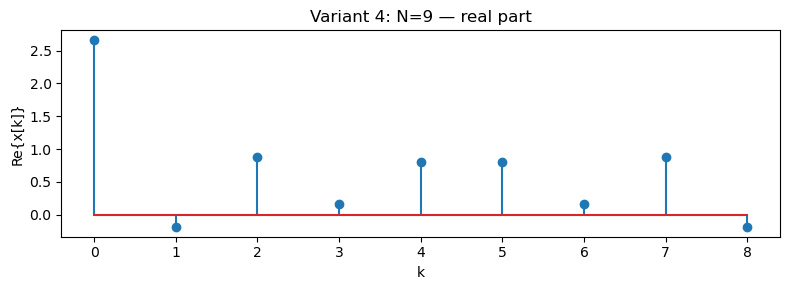

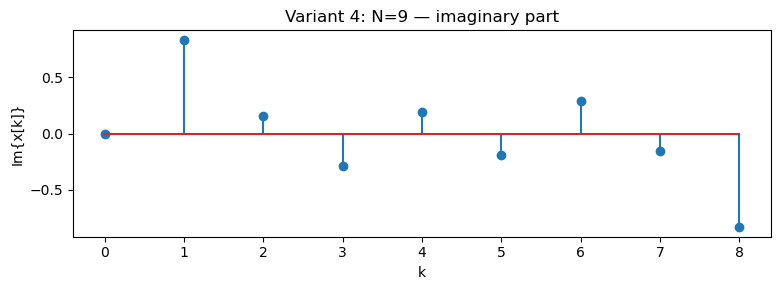


=== Variant 5 — N=11 ===
N=11
K (top-left 8x8):
 [[ 0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7]
 [ 0  2  4  6  8 10 12 14]
 [ 0  3  6  9 12 15 18 21]
 [ 0  4  8 12 16 20 24 28]
 [ 0  5 10 15 20 25 30 35]
 [ 0  6 12 18 24 30 36 42]
 [ 0  7 14 21 28 35 42 49]]

W (real, top-left 8x8):
 [[ 1.     1.     1.     1.     1.     1.     1.     1.   ]
 [ 1.     0.841  0.415 -0.142 -0.655 -0.959 -0.959 -0.655]
 [ 1.     0.415 -0.655 -0.959 -0.142  0.841  0.841 -0.142]
 [ 1.    -0.142 -0.959  0.415  0.841 -0.655 -0.655  0.841]
 [ 1.    -0.655 -0.142  0.841 -0.959  0.415  0.415 -0.959]
 [ 1.    -0.959  0.841 -0.655  0.415 -0.142 -0.142  0.415]
 [ 1.    -0.959  0.841 -0.655  0.415 -0.142 -0.142  0.415]
 [ 1.    -0.655 -0.142  0.841 -0.959  0.415  0.415 -0.959]]

W (imag, top-left 8x8):
 [[ 0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.541  0.91   0.99   0.756  0.282 -0.282 -0.756]
 [ 0.     0.91   0.756 -0.282 -0.99  -0.541  0.541  0.99 ]
 [ 0.     0.99  -0.282 -0.91   

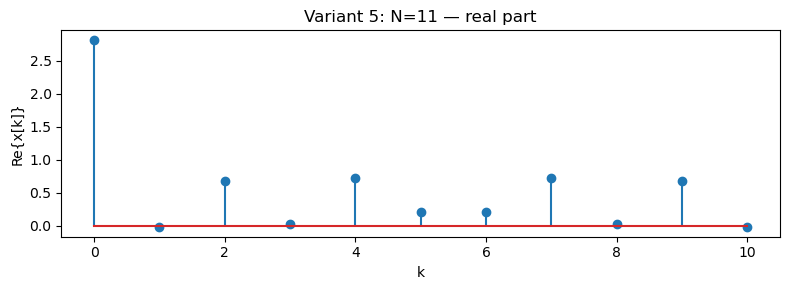

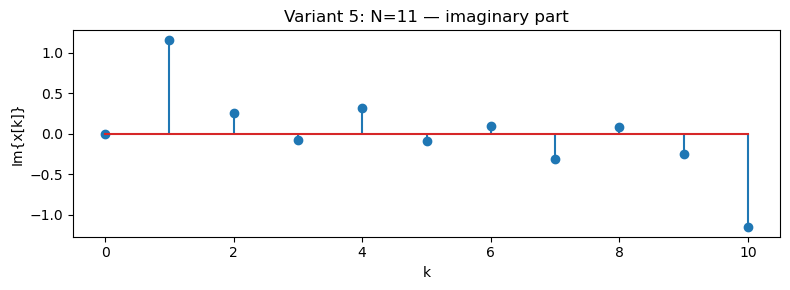


=== Variant 6 — N=10 ===
N=10
K (top-left 8x8):
 [[ 0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7]
 [ 0  2  4  6  8 10 12 14]
 [ 0  3  6  9 12 15 18 21]
 [ 0  4  8 12 16 20 24 28]
 [ 0  5 10 15 20 25 30 35]
 [ 0  6 12 18 24 30 36 42]
 [ 0  7 14 21 28 35 42 49]]

W (real, top-left 8x8):
 [[ 1.     1.     1.     1.     1.     1.     1.     1.   ]
 [ 1.     0.809  0.309 -0.309 -0.809 -1.    -0.809 -0.309]
 [ 1.     0.309 -0.809 -0.809  0.309  1.     0.309 -0.809]
 [ 1.    -0.309 -0.809  0.809  0.309 -1.     0.309  0.809]
 [ 1.    -0.809  0.309  0.309 -0.809  1.    -0.809  0.309]
 [ 1.    -1.     1.    -1.     1.    -1.     1.    -1.   ]
 [ 1.    -0.809  0.309  0.309 -0.809  1.    -0.809  0.309]
 [ 1.    -0.309 -0.809  0.809  0.309 -1.     0.309  0.809]]

W (imag, top-left 8x8):
 [[ 0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.588  0.951  0.951  0.588  0.    -0.588 -0.951]
 [ 0.     0.951  0.588 -0.588 -0.951 -0.     0.951  0.588]
 [ 0.     0.951 -0.588 -0.588  

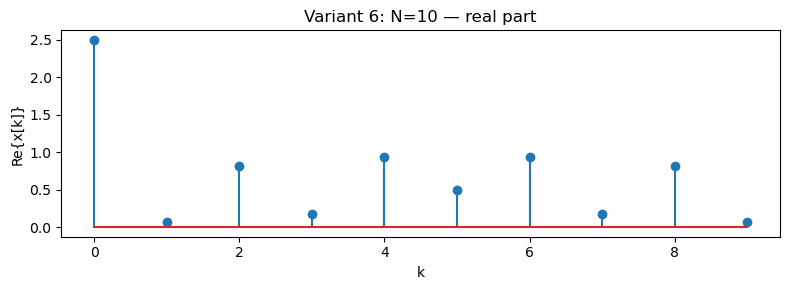

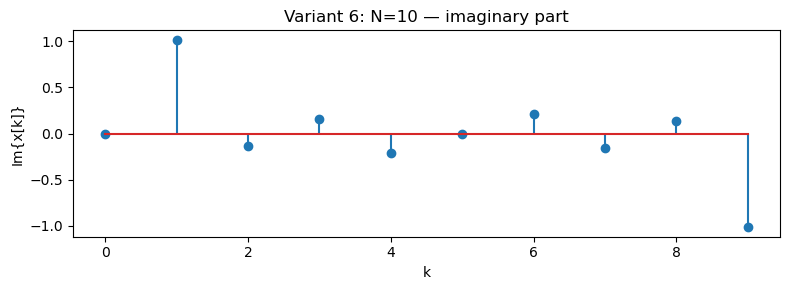


=== Variant 7 — N=10 ===
N=10
K (top-left 8x8):
 [[ 0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7]
 [ 0  2  4  6  8 10 12 14]
 [ 0  3  6  9 12 15 18 21]
 [ 0  4  8 12 16 20 24 28]
 [ 0  5 10 15 20 25 30 35]
 [ 0  6 12 18 24 30 36 42]
 [ 0  7 14 21 28 35 42 49]]

W (real, top-left 8x8):
 [[ 1.     1.     1.     1.     1.     1.     1.     1.   ]
 [ 1.     0.809  0.309 -0.309 -0.809 -1.    -0.809 -0.309]
 [ 1.     0.309 -0.809 -0.809  0.309  1.     0.309 -0.809]
 [ 1.    -0.309 -0.809  0.809  0.309 -1.     0.309  0.809]
 [ 1.    -0.809  0.309  0.309 -0.809  1.    -0.809  0.309]
 [ 1.    -1.     1.    -1.     1.    -1.     1.    -1.   ]
 [ 1.    -0.809  0.309  0.309 -0.809  1.    -0.809  0.309]
 [ 1.    -0.309 -0.809  0.809  0.309 -1.     0.309  0.809]]

W (imag, top-left 8x8):
 [[ 0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.588  0.951  0.951  0.588  0.    -0.588 -0.951]
 [ 0.     0.951  0.588 -0.588 -0.951 -0.     0.951  0.588]
 [ 0.     0.951 -0.588 -0.588  

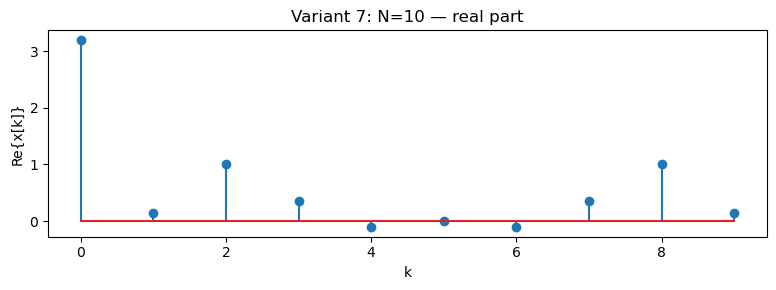

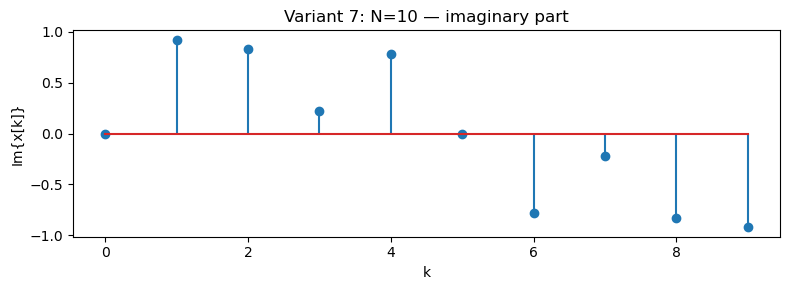


=== Variant 8 — N=10 ===
N=10
K (top-left 8x8):
 [[ 0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7]
 [ 0  2  4  6  8 10 12 14]
 [ 0  3  6  9 12 15 18 21]
 [ 0  4  8 12 16 20 24 28]
 [ 0  5 10 15 20 25 30 35]
 [ 0  6 12 18 24 30 36 42]
 [ 0  7 14 21 28 35 42 49]]

W (real, top-left 8x8):
 [[ 1.     1.     1.     1.     1.     1.     1.     1.   ]
 [ 1.     0.809  0.309 -0.309 -0.809 -1.    -0.809 -0.309]
 [ 1.     0.309 -0.809 -0.809  0.309  1.     0.309 -0.809]
 [ 1.    -0.309 -0.809  0.809  0.309 -1.     0.309  0.809]
 [ 1.    -0.809  0.309  0.309 -0.809  1.    -0.809  0.309]
 [ 1.    -1.     1.    -1.     1.    -1.     1.    -1.   ]
 [ 1.    -0.809  0.309  0.309 -0.809  1.    -0.809  0.309]
 [ 1.    -0.309 -0.809  0.809  0.309 -1.     0.309  0.809]]

W (imag, top-left 8x8):
 [[ 0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.588  0.951  0.951  0.588  0.    -0.588 -0.951]
 [ 0.     0.951  0.588 -0.588 -0.951 -0.     0.951  0.588]
 [ 0.     0.951 -0.588 -0.588  

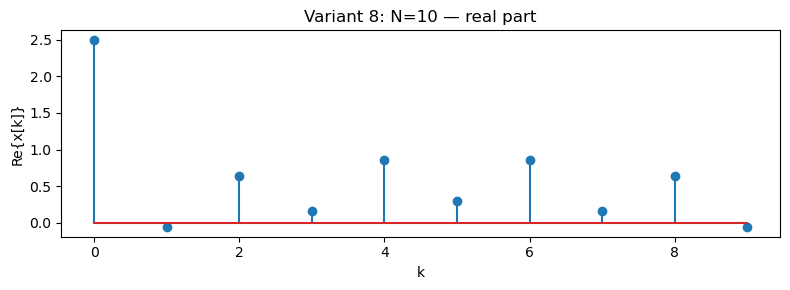

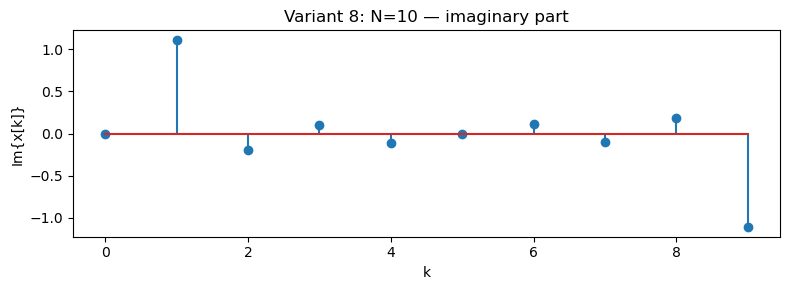


=== Variant 9 — N=10 ===
N=10
K (top-left 8x8):
 [[ 0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7]
 [ 0  2  4  6  8 10 12 14]
 [ 0  3  6  9 12 15 18 21]
 [ 0  4  8 12 16 20 24 28]
 [ 0  5 10 15 20 25 30 35]
 [ 0  6 12 18 24 30 36 42]
 [ 0  7 14 21 28 35 42 49]]

W (real, top-left 8x8):
 [[ 1.     1.     1.     1.     1.     1.     1.     1.   ]
 [ 1.     0.809  0.309 -0.309 -0.809 -1.    -0.809 -0.309]
 [ 1.     0.309 -0.809 -0.809  0.309  1.     0.309 -0.809]
 [ 1.    -0.309 -0.809  0.809  0.309 -1.     0.309  0.809]
 [ 1.    -0.809  0.309  0.309 -0.809  1.    -0.809  0.309]
 [ 1.    -1.     1.    -1.     1.    -1.     1.    -1.   ]
 [ 1.    -0.809  0.309  0.309 -0.809  1.    -0.809  0.309]
 [ 1.    -0.309 -0.809  0.809  0.309 -1.     0.309  0.809]]

W (imag, top-left 8x8):
 [[ 0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.588  0.951  0.951  0.588  0.    -0.588 -0.951]
 [ 0.     0.951  0.588 -0.588 -0.951 -0.     0.951  0.588]
 [ 0.     0.951 -0.588 -0.588  

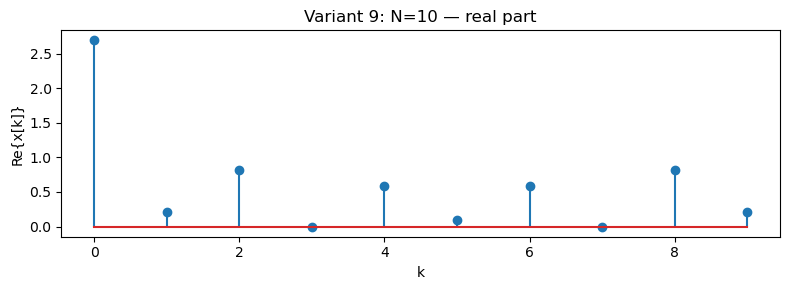

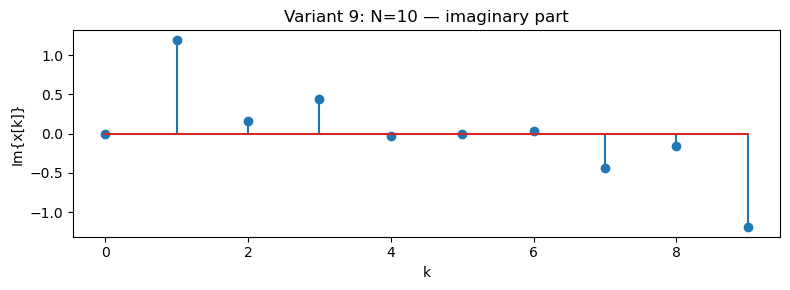


=== Variant 10 — N=10 ===
N=10
K (top-left 8x8):
 [[ 0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7]
 [ 0  2  4  6  8 10 12 14]
 [ 0  3  6  9 12 15 18 21]
 [ 0  4  8 12 16 20 24 28]
 [ 0  5 10 15 20 25 30 35]
 [ 0  6 12 18 24 30 36 42]
 [ 0  7 14 21 28 35 42 49]]

W (real, top-left 8x8):
 [[ 1.     1.     1.     1.     1.     1.     1.     1.   ]
 [ 1.     0.809  0.309 -0.309 -0.809 -1.    -0.809 -0.309]
 [ 1.     0.309 -0.809 -0.809  0.309  1.     0.309 -0.809]
 [ 1.    -0.309 -0.809  0.809  0.309 -1.     0.309  0.809]
 [ 1.    -0.809  0.309  0.309 -0.809  1.    -0.809  0.309]
 [ 1.    -1.     1.    -1.     1.    -1.     1.    -1.   ]
 [ 1.    -0.809  0.309  0.309 -0.809  1.    -0.809  0.309]
 [ 1.    -0.309 -0.809  0.809  0.309 -1.     0.309  0.809]]

W (imag, top-left 8x8):
 [[ 0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.588  0.951  0.951  0.588  0.    -0.588 -0.951]
 [ 0.     0.951  0.588 -0.588 -0.951 -0.     0.951  0.588]
 [ 0.     0.951 -0.588 -0.588 

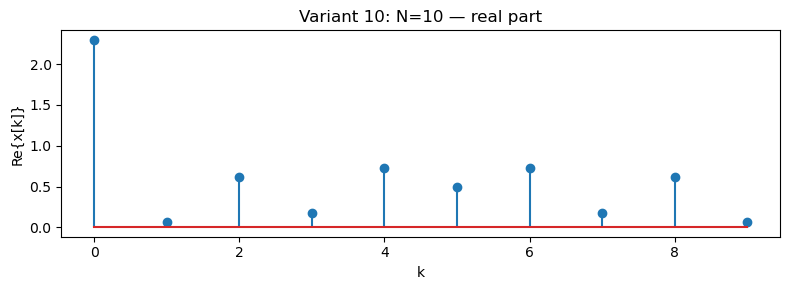

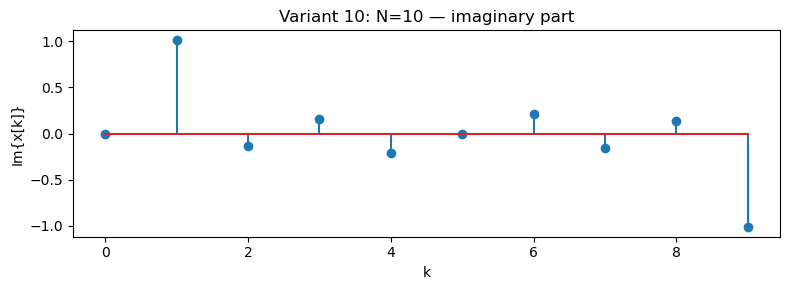

In [9]:

variants = [
    [6, 2, 4, 3, 4, 5, 0, 0, 0, 0],
    [10, 5, 6, 6, 2, 4, 3, 4, 5, 0, 0, 0, 0],
    [6, 2, 4, 3, 4, 5, 0, 0, 0, 0],
    [6, 2, 4, 3, 4, 5, 0, 0, 0],
    [6, 4, 4, 5, 3, 4, 5, 0, 0, 0, 0],
    [7, 2, 4, 3, 4, 5, 0, 0, 0, 0],
    [6, 8, 2, 4, 3, 4, 5, 0, 0, 0],
    [6, 2, 4, 4, 4, 5, 0, 0, 0, 0],
    [6, 5, 4, 3, 4, 5, 0, 0, 0, 0],
    [6, 2, 4, 3, 4, 4, 0, 0, 0, 0],
]

for i, xmu in enumerate(variants, start=1):
    xk, K, W = idft_matrix(xmu)
    print(f"\n=== Variant {i} — N={len(xmu)} ===")
    show_matrices(K, W, max_show=8)
    plot_signal(xk, title=f"Variant {i}: N={len(xmu)}")


## 3) Playground — try your own vector x_mu

N=8
K (top-left 8x8):
 [[ 0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7]
 [ 0  2  4  6  8 10 12 14]
 [ 0  3  6  9 12 15 18 21]
 [ 0  4  8 12 16 20 24 28]
 [ 0  5 10 15 20 25 30 35]
 [ 0  6 12 18 24 30 36 42]
 [ 0  7 14 21 28 35 42 49]]

W (real, top-left 8x8):
 [[ 1.     1.     1.     1.     1.     1.     1.     1.   ]
 [ 1.     0.707  0.    -0.707 -1.    -0.707 -0.     0.707]
 [ 1.     0.    -1.    -0.     1.     0.    -1.    -0.   ]
 [ 1.    -0.707 -0.     0.707 -1.     0.707  0.    -0.707]
 [ 1.    -1.     1.    -1.     1.    -1.     1.    -1.   ]
 [ 1.    -0.707  0.     0.707 -1.     0.707 -0.    -0.707]
 [ 1.    -0.    -1.     0.     1.    -0.    -1.    -0.   ]
 [ 1.     0.707 -0.    -0.707 -1.    -0.707 -0.     0.707]]

W (imag, top-left 8x8):
 [[ 0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.707  1.     0.707  0.    -0.707 -1.    -0.707]
 [ 0.     1.     0.    -1.    -0.     1.     0.    -1.   ]
 [ 0.     0.707 -1.     0.707  0.    -0.707  1.    -0.707]

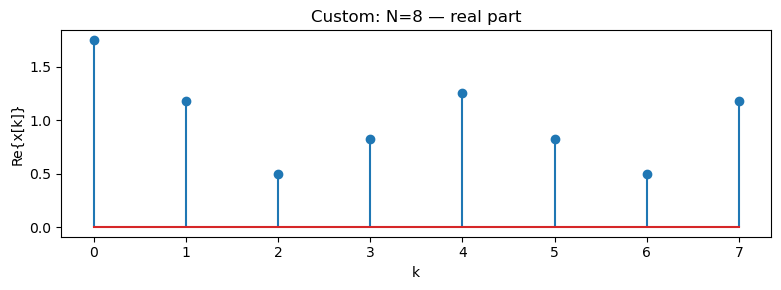

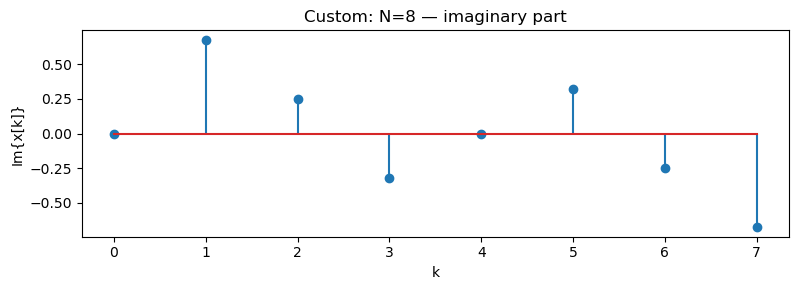

In [10]:

xmu_custom = [8, 2, 4, 0, 0, 0, 0, 0]   # N=8 example
xk, K, W = idft_matrix(xmu_custom)
show_matrices(K, W, max_show=8)
plot_signal(xk, title=f"Custom: N={len(xmu_custom)}")
